#### Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading

In [4]:
df = pd.read_csv("data/raw/financial_health_analysis_dataset.csv")
df.head()

,Date,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost
0,2000-01-01,91910,56996,34914,36583,37428,50606,50085,14159,278,7633,42235.94
1,2000-01-02,76044,17614,58430,57621,15068,143451,53894,12173,346,11913,12960.62
2,2000-01-03,87214,49647,37567,42285,20229,67733,30019,15107,379,11490,39471.72
3,2000-01-04,53827,72940,-19113,-16957,33478,90394,53827,17132,444,3905,56926.27
4,2000-01-05,75820,15620,60200,63913,21908,110797,28184,14723,220,13197,12298.48


#### Data Cleaning
a. Handle missing values

In [8]:
# count missing
df.isnull().sum()

Date                0
Revenue             0
Expenses            0
Profit              0
Cash Flow           0
Debt                0
Assets              0
Liabilities         0
Marketing Spend     0
Employee Count      0
Tax Paid            0
Operational Cost    0
dtype: int64

b. Identify & address outliers

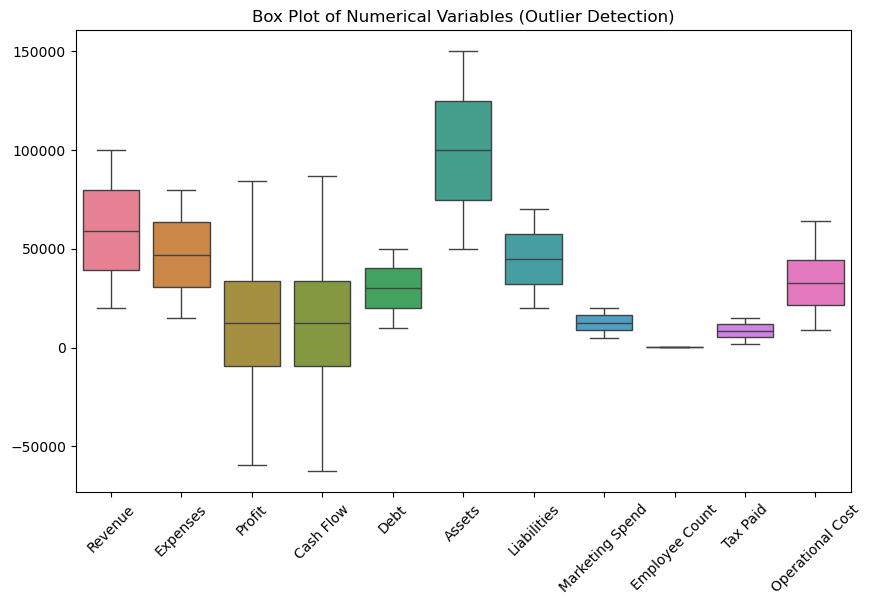

In [22]:
# Select numerical cols excluding date
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Box plot for outlier detection
plt.figure(figsize = (10, 6))
sns.boxplot(data = df[num_cols])
plt.title("Box Plot of Numerical Variables (Outlier Detection)")
plt.xticks(rotation = 45)
plt.show()

In [13]:
# Quantify Outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
    print(f"{col}: {len(outliers)} outliers")

Revenue: 0 outliers
Expenses: 0 outliers
Profit: 0 outliers
Cash Flow: 0 outliers
Debt: 0 outliers
Assets: 0 outliers
Liabilities: 0 outliers
Marketing Spend: 0 outliers
Employee Count: 0 outliers
Tax Paid: 0 outliers
Operational Cost: 0 outliers


c. Data consistency check

In [14]:
# Check if profit = Revenue - Expenses (should be all true)
print("Profit consistency check:", all(df["Profit"] == (df["Revenue"] - df["Expenses"])))

# Check if assets >= Liabilities (should be all true)
print("Assets >= Liabilities:", all(df["Assets"] >= df["Liabilities"]))

Profit consistency check: True
Assets >= Liabilities: False


In [16]:
# Find rows where Liabilities > Assets
problem_records = df[df["Liabilities"] > df["Assets"]]
print(f"Number of inconsistent records: {len(problem_records)}")
display(problem_records[["Date", "Assets", "Liabilities"]])

Number of inconsistent records: 803


,Date,Assets,Liabilities
53,2000-02-23,55571,56906
118,2000-04-28,56740,62059
171,2000-06-20,66156,68817
177,2000-06-26,52710,60052
196,2000-07-15,50740,52577
...,...,...,...
19845,2054-05-02,54315,69236
19867,2054-05-24,63999,67931
19872,2054-05-29,55967,60497
19976,2054-09-10,55439,55983


Time-Series Trends

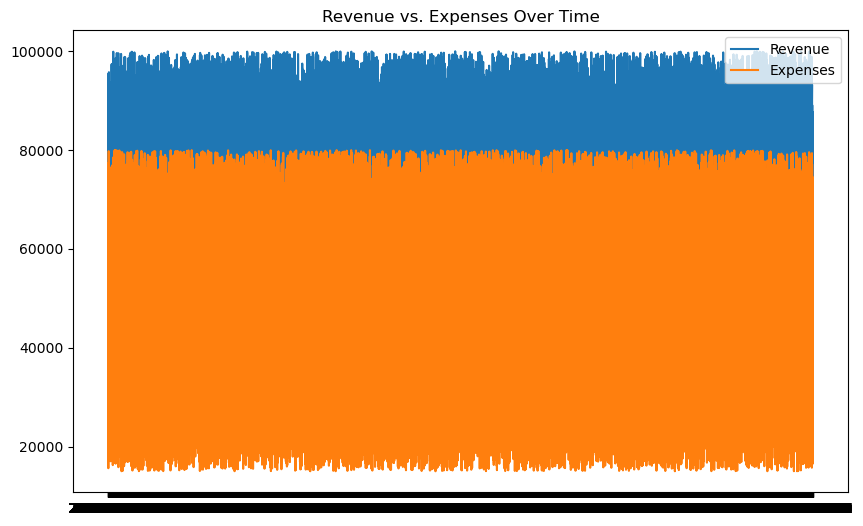

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Revenue"], label = "Revenue")
plt.plot(df["Date"], df["Expenses"], label = "Expenses")
plt.title("Revenue vs. Expenses Over Time")
plt.legend()
plt.show()